![Title picture](./img/title_RUS.png)
<br>
**Lecture:** 🇷🇺 / **Slides:** 🇺🇸 <br>
**Talk:** discord `#co15-ликбез-по-алгоритмам` (🇷🇺)

*SMTB-2021: A Glimpse into Algorithms | Alexey Bochkarev* ([🖂](mailto:a@bochkarev.io), [🌐](https://www.bochkarev.io/contact))

# The main goal <a class="tocSkip">
    
- To *mention* some key definitions and "buzzwords", 
- To provide a first glimpse on the structure of the material out there. **(not a substitute to a proper CS course)**
- So you could learn more if needed, and know what to google.

**Why bother?**
- to create / implement algorithms,
- to understand what is going on in a paper,
- to understand what is possible (or not), and what to use for your problem at hand.
    
**Prereqs:** ability to read (pseudo-)code -- we will use Python 3.

# Technical: How to open these notebooks <a class="tocSkip">
- The updated version is on the School GDrive and [Github](https://github.com/alex-bochkarev/Algo-SMTB-2021) ([how to clone](https://docs.github.com/en/github/creating-cloning-and-archiving-repositories/cloning-a-repository) or [download ZIP](https://github.com/alex-bochkarev/SMTB-Algo/archive/master.zip))
- You'd need Python 3 along with several packages (hopefully `conda install <what-is-missing>` will help you just in case).
- With a (free) Google account, you can [![Open it in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alex-bochkarev/Algo-SMTB-21/blob/master/T1-2-Algorithms.ipynb)
- Finally, `nbviewer` (see the link in `README`) renders it read-only, but zero-config.
    
**Note:** The presentation was made from this very notebook.

**COMMENTS / SUGGESTIONS ARE VERY WELCOME!**

# Course intro <a class="tocSkip">
- Welcome!
- Course [outline](./README.org) and logistics/tech.
  + 👉 **Topic 1:** we will try *designing* algorithms, taking sorting problem as an example (and using several approaches you might have heared about).
  + 👉 **Topic 2:** we will discuss more systematically how to compare algorithms, focusing on the concept of runtime.
  + **Topic 3:** a specific example of a more "biological" algorithm (aligning sequences),
  + **Topic 4:** let's talk data structures.

In [1]:
# import libraries for today:
import numpy as np # numbers/arrays manipulation
from copy import copy
from itertools import permutations

# Topic 1: Algorithms intro <a class="tocSkip">
<br><br><br>

<div style="text-align: right"> <em>Alexey Bochkarev, 2021, a [at] bochkarev (dot) io </em></div>

**Content of the first topic (today):**
- What is an algorithm (vs. a computer program).
- Key properties: correctness, time, and space requirements (without details)
- Several examples of sorting algorithms
- Correctness and testing
- A word on algorithmic *frameworks* / "types" of algorithms: greedy, D&C, randomized, brute-force, DP, ...

## What is an algorithm?
Well, a recipe. Not good as a strict definition, but as put by [The Economist](https://www.economist.com/the-economist-explains/2017/08/29/what-are-algorithms),

*An algorithm is, essentially, a brainless way of doing clever things.*

A clear, step-by-step instructions manual, how to acheive something specific. Like, 
- get to the bus stop from some specific point, 
- sort an array of $N$ numbers, or
- assemble the original genome sequence from a smaller, potentially overlapping pieces. 
- ...and so on.

(Without too vague instructions.)

Not a big deal, so far...

**Note:** algorithm $\neq$ computer program. The former are abstract solution procedures, recipes, while the latter are their implementations in some specific programming language.

We will talk about **algorithms** today -- but we'll consider some specific examples of **programs** too. I suppose, it will be a little easier this way.

In order to discuss and illustrate some of these, let us pick a specific problem as an example.

### A specific example: sorting <a class="tocSkip">
**INPUT:**   an array of some fixed length, $N$. Say, integer numbers<br>
**OUTPUT:**  a sorted version of the same array (each next number is larger than the previous one).
    
For example, [4,6,1,3,2,5,7] $\rightarrow$ [1,2,3,4,5,6,7]. Obviously, there are many ways to approach the problem. 

That is why we consider it in first place: it is easy to understand,
and fun to solve.

The key technical staple of the course:

> **Talk is cheap. Show me the code.**
> 
> *Linus Torvalds*

**First:** let's start from an intuitive definition: a sorted array is such that the smallest elements go left. Well, okay, we can implement this in a **"greedy"** fashion.

In [2]:
def swap(array, i, j):
    """Swaps two elements (with indices ``i`` and ``j``) within ``array``."""
    if i==j:
        return  # just do nothing

    old_i = array[i]
    array[i] = array[j]
    array[j] = old_i

In [3]:
def selection_sort(input_array):
    """Sorts ``input_array`` by moving the smallest element at each step."""
    sorted_array = copy(input_array)

    for first_unsorted in range(0, len(sorted_array)-1):
        min_element_i = first_unsorted
        for i in range(first_unsorted+1, len(sorted_array)):
            if sorted_array[i] < sorted_array[min_element_i]:
                min_element_i = i

        swap(sorted_array, first_unsorted, min_element_i)

    return sorted_array

In [4]:
print(selection_sort([5,4,3,1,2]))
print(selection_sort([1,3,5,2,7]))
print(selection_sort([1,2,3,4,5]))

[1, 2, 3, 4, 5]
[1, 2, 3, 5, 7]
[1, 2, 3, 4, 5]


Another idea: how would you check that the array is sorted?

Well, easy:

In [5]:
def is_sorted(array):
    """Checks if ``array`` is sorted."""
    for i in range(len(array)-1):
        if array[i] > array[i+1]:
            return False

    return True  # we haven't found anything suspicious

In [6]:
print(is_sorted([1,2,3,4,5]))
print(is_sorted([1,5,3,4,2]))

True
False


### Oh, let's use this idea!

First, without applying any thought:

In [7]:
## A really, really straightforward approach:
def brute_force_enum_sort(input_array):
    """Just tries everything until the array is sorted."""
    for perm in permutations(input_array):
        if is_sorted(perm):
            return list(perm)

    return None  # something must have gone very wrong if we are here

Do you see a problem with this?

In [8]:
%time brute_force_enum_sort([3,2,5,7,10,15,0,6,9,1])

CPU times: user 1.52 s, sys: 0 ns, total: 1.52 s
Wall time: 1.52 s


[0, 1, 2, 3, 5, 6, 7, 9, 10, 15]

In [9]:
# For reference:
%time selection_sort([3,2,5,7,10,15,0,6,9,1])

CPU times: user 48 µs, sys: 0 ns, total: 48 µs
Wall time: 52.7 µs


[0, 1, 2, 3, 5, 6, 7, 9, 10, 15]

(okay, we won't consider this further -- it is ridiculously slow!)

*But:* In `is_sorted` we can not just cry with `False` if we found a problem, but fix it! Let's see if we can implement this idea in the code:

In [10]:
def bubble_sort(input_array):
    """Sorts the ``input_array`` with Bubble sort algorithm.

    (see https://en.wikipedia.org/wiki/Bubble_sort for more info)
    """
    done = False
    sorted_array = copy(input_array)

    while not done:
        done = True
        for i in range(len(input_array)-1):
            if sorted_array[i] > sorted_array[i+1]:
                # here's a problem!
                swap(sorted_array, i, i+1)
                done = False

    return sorted_array

In [11]:
print(bubble_sort([4,6,1,3,2,5,7]))
print(bubble_sort([6,4,7,1,2]))

[1, 2, 3, 4, 5, 6, 7]
[1, 2, 4, 6, 7]


### Any other possible algorithms, though? <a class="tocSkip">
(also see the mandatory [xkcd](https://xkcd.com/1185/); don't try to run at home :))

In [12]:
def panic_sort(input_array):
    """Sorts ``input_array`` with a famous (although, non-existent)
    panic sort algorithm.
    """
    np.random.seed(1234)

    output_array = copy(input_array)  # uh, okay, let's start somewhere

    for i in range(1000):
        output_array = np.random.permutation(output_array) ## come on, come on!..

    return output_array

In [13]:
A = [3,7,9,8,6,2,5,1,10,4]
panic_sort(A)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [14]:
A = [136,1024,50,47,51,48,5,13,35,207,200,202,50,7]
print(panic_sort(A))

[   5    7   13   35   47   48   50   50   51  136  200  202  207 1024]


In [15]:
is_sorted( panic_sort(A) )

True

### or (this one is tricky): <a class="tocSkip">
Hey, what if I already know the correct order? Is it worth the hassle at all?..

In [16]:
def real_quick_sort(input_array):
    """*Kinda* sorts `input_array` by returning consecutive numbers 1,..,N
    (where ``N`` is the length of ``input_array``)
    """

    N = len(input_array)
    # throw away ``input_array`` altogether

    return([i for i in range(1, N+1)])

In [17]:
real_quick_sort([1,5,4,2,3])

[1, 2, 3, 4, 5]

In [18]:
real_quick_sort([4,6,1,3,2,5,7])

[1, 2, 3, 4, 5, 6, 7]

## So, by now we have four sorting algorithms
- selection sort
- bubble sort
- real-quick sort (*)
- panic sort (*)

Let's compare them!

(*) have sort of limited applicability :)

### What are some important properties of the algorithms?
Thoughts?

- does it result in a desirable outcome? **(correctness)**
- how much memory does it take? **(space/memory requirement)**
- how fast is it? **(runtime)**

But also:
- can I run it over several machines (or just cores)?
- is it understandable, after all?..

### Correctness
- this is something you need to **prove** rigorously;
- however, first, let's prepare a tiny **testing unit** to check if our algorithms work. It won't guarantee anything, but would *suggest* that we haven't screwed up anywhere.

In [19]:
def get_consec_instance(N):
    """Generates a test instance of length `N` (consecutive numbers).
    
    How: creates a random permutation of consecutive
    integers 1, ..., N.

    Returns:
        A tuple, sorted array and unsorted array.
    """
    input_sorted = [i+1 for i in range(N)] # generate a sequence of numbers

    input_unsorted = np.random.permutation(input_sorted)
    return input_sorted, list(input_unsorted)

get_consec_instance(5)

([1, 2, 3, 4, 5], [4, 2, 3, 1, 5])

In [20]:
def get_rnd_instance(N):
    """Generates a test instance of length `N` (random numbers).

    How: creates a sorted array first
    (by adding random numbers consecutively),
    then returns a random permutation of the sorted array.

    Returns:
        A tuple, sorted array and unsorted array.
    """
    input_sorted = [np.random.randint(low=0, high= N // 2)]  # the first number
    
    for i in range(1,N):
        input_sorted.append(input_sorted[i-1] + \
                            np.random.randint(low=1, high=N // 2))

    input_unsorted = np.random.permutation(input_sorted)

    return input_sorted, list(input_unsorted)

get_rnd_instance(10)

([1, 4, 7, 10, 13, 15, 17, 20, 21, 22], [4, 13, 21, 7, 22, 17, 20, 10, 15, 1])

In [21]:
def test_algo(label, sort_function, instances_list):
    """Tests given algorithm against a set of instances.

    Args:
        label (str):                algorithm label to print,
        sort_function (function):   algorithm implementation,
        instances_list (list):      a list of instances, each element represents 
            a pair of versions (sorted, unsorted)

    Returns:
        nothing. Prints summary to the screen. For each instance:
        a dot (.) if successful, instance summary if not.
    """
    print(f"Testing algo: `{label}`")

    n_failed = 0
    for instance in instances_list:
        arr_sorted, arr_unsorted = instance
        out = sort_function(arr_unsorted)
        if np.all(out == arr_sorted):
            print(".", end="")
        else:
            print(f"\nFAIL: expected {arr_sorted}, returned {out}", end="")
            n_failed += 1
    print(f"\ndone. FAILS: {n_failed} out of {len(instances_list)} ({n_failed*100 / len(instances_list):.1f}%)")

OK, let's see if our algorithms work:

In [22]:
np.random.seed()
instances_list = [get_consec_instance(10) for _ in range(50)] + \
    [get_rnd_instance(10) for _ in range(50)]

for sorting_func, label in [
        (selection_sort, "Selection sort"),
        (bubble_sort, "Bubble sort"), 
        (panic_sort, "Panic sort"), 
        (real_quick_sort, "Real quick sort")]:

    print("==================================================")
    test_algo(label, sorting_func, instances_list)

Testing algo: `Selection sort`
....................................................................................................
done. FAILS: 0 out of 100 (0.0%)
Testing algo: `Bubble sort`
....................................................................................................
done. FAILS: 0 out of 100 (0.0%)
Testing algo: `Panic sort`

FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 7 10  2  5  9  3  8  6  1  4]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 6  5  3 10  2  7  9  4  1  8]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 8  6  7  3  9  5 10  4  2  1]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 3  5  6 10  1  8  4  2  7  9]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 9  3  2  1  4  7  5 10  8  6]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 7  5  6  9  8 10  3  4  2  1]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 6  4  2  5  7  8  9  3 10  1]
FAIL: expected [1, 2, 

FAIL: expected [4, 7, 8, 11, 14, 17, 21, 25, 29, 32], returned [25 29 21 11  4  7 14 17  8 32]
FAIL: expected [0, 3, 4, 5, 9, 10, 13, 15, 16, 17], returned [ 0 15 13 16  4  3 10  5  9 17]
FAIL: expected [1, 3, 5, 8, 9, 10, 12, 15, 16, 20], returned [ 8  5 12 10 16  9 20 15  3  1]
FAIL: expected [0, 4, 7, 8, 12, 13, 17, 20, 22, 23], returned [23 13  0 22 12 17 20  8  4  7]
FAIL: expected [3, 4, 5, 9, 13, 17, 20, 23, 24, 25], returned [24 13 23  3 17  9 20 25  4  5]
FAIL: expected [0, 3, 5, 6, 7, 10, 12, 16, 17, 19], returned [ 6  7  5  0 17 12 10  3 19 16]
FAIL: expected [2, 5, 7, 9, 10, 11, 14, 15, 18, 19], returned [ 2 15 18 19 11  5 14 10  9  7]
FAIL: expected [4, 7, 11, 12, 13, 15, 19, 22, 26, 28], returned [15 22 11 26  7 13 12 19 28  4]
FAIL: expected [4, 7, 9, 13, 17, 21, 24, 26, 30, 31], returned [ 4 24  7  9 30 17 21 13 31 26]
FAIL: expected [0, 3, 5, 9, 10, 13, 17, 21, 23, 26], returned [17 26  9  0  5  3 10 13 21 23]
FAIL: expected [2, 6, 10, 12, 13, 16, 18, 19, 21, 23], retu

(This "real quick sort" is not completely "fake", though. It is okay assuming you know something about your `input_array`. If interested, see [Bucket sort](https://en.wikipedia.org/wiki/Bucket_sort), [Radix sort](https://en.wikipedia.org/wiki/Radix_sort) and such)

**Bottom line:** 
- correctness can be tested with a simple testing framework. Just generate a bunch of random (or not random, but carefully engineered!) instances, and see if it fails.
- by the way, there are convenient "testing frameworks" in different languages, e.g., see [pytest](https://www.pytest.org) for Python.

- **HOWEVER:** it does not guarantee anything, strictly speaking. Correctness is a property of an algorithm that needs to be proved.

For **bubble sort**, for instance:
- first, make sure that our `is_sorted` criterion is valid,
- then, observe that `bubble_sort` stops only after the array is sorted (otherwise `is_done` would be `False`).
- finally, note that at each pass the algorithm "fixes" at least one "wrong" pair of elements, and the number of such pairs is finite.

Therefore, the algorithm finishes in finite time, and the result will be the sorted array.

- **HOWEVER-2:**
> ``...Beware of bugs in the above code; I have only proved it correct, not tried it.''
>
> *Donald E. Knuth*

Note that we have just designed several "types" of algorithms to sort an array of numbers:
- **Selection sort** -- a "greedy" algorithm (grabs the smallest element every time).
- **Brute-force enumeration** -- just all possible orderings.
- **Bubble sort** -- a natural first implementation based on a correctness criterion. We started with what we had, and incrementally "fixed" the solution, until it was good.
- ... and some other variants (including a really fast version that leveraged some prior knowledge about a problem -- e.g., that the numbers are consecutive).

- there are other "keywords" relevant to the algo design:
  + we will consider **"Divide and Conquer"** momentarily,
  + in this course we will also consider something called **"Dynamic Programming"**, which is about smart problem decomposition.
  + sometimes, e.g., finding "best" solution (in some sense) you can start the "enumeration" route, but find smart ways to disregard whole groups of solutions. (See **branch and bound** and the like) 
  + sometimes, you can design a surprisingly efficient algorithm that... well, just **flips a coin** from time to time :) (**randomized** algorithms)
  
The list is not exhustive, of course.

# Take-aways so far
We considered several sorting algorithms (bubble sort and selection sort).
- Algorithms are (theoretical) "recipes", which can be *implemented* in code (e.g. in Python, C++, or Java).
- They can (and should) be analyzed in a systematic, scientific way
- ... and are characterized by runtime, space requirements, and correctness.
- (Of course, there are more characteristics.)
- Correctness needs to be proved, but making numerical tests is handy.

**thinking with ☕ :** how in the world our `panic_sort` worked for two instances?..

**Any questions at this point?**

# Topic 2: Runtime <a class="tocSkip">
<br><br><br>

<div style="text-align: right"> <em>Alexey Bochkarev, 2021, a [at] bochkarev (dot) io </em></div>

# Runtime

In order to discuss this, let us first introduce another algorithm, **merge sort**. It will be *faster* -- and this will allow us to discuss what a "faster" means.

In [23]:
# We will need more libraries for this part
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from math import log, log2

- Imagine an array, split it into two halves.
- What if we had a *magic* function that would sort each half?

![halfsorted](img/merge_sort.png)

Now, we could easily *merge* these two into a sorted array: just use two pointers `i left` and `i right`. Scan left to right, picking the smallest one and increasing pointers as necessary.

Let us just fix this in the code, while we are at it:

In [24]:
def merge(left, right):
    """Merges sorted arrays ``left`` and ``right`` into a single sorted array

    Notes:
        - the only slightly tricky part here is handling edge cases
        - this is not the best implementation in the world.
          E.g., fixed-length ``result`` would be more logical.
    """
    result = []
    i_left = 0; i_right = 0
    while len(result) < len(left) + len(right):
        if i_left == len(left):  # no more elements in the "left" list
            result.append(right[i_right])
            i_right += 1
        elif i_right == len(right): # no more elements in the "right" list
            result.append(left[i_left])
            i_left += 1
        else:  # there are elements in both lists
            if right[i_right] < left[i_left]:
                result.append(right[i_right])
                i_right += 1
            else:
                result.append(left[i_left])
                i_left += 1

    return result

In [25]:
merge([1,3,5,7],[2,4,6])

[1, 2, 3, 4, 5, 6, 7]

OK, you might say, but we don't have any "magic function", do we? 

Let's just cheat now, and pretend we do:

In [26]:
def merge_sort(input_array):
    """Sorts `input_array` with merge sort.

    (See, e.g., https://www.geeksforgeeks.org/merge-sort/ for quick description,
    or Wiki)
    """
    result = []

    N = len(input_array)
    if N == 1:
        return input_array # nothing to sort

    m = N // 2  # find the middle
    left = input_array[:m]
    right = input_array[m:]

    # here is the magic
    left = merge_sort(left)
    right = merge_sort(right)

    return merge(left, right)

In [27]:
# In case you were hesitating:
merge_sort([4,6,1,3,2,5,7])

[1, 2, 3, 4, 5, 6, 7]

... oh, what has just happened?.. 👀

- **Merge sort** -- a "divide and conquer" algorithm (divides a problem into smaller pieces and then reconstructs the solution).

### So, Runtime

Everyone is data-driven these days, right? -- so let's just make some data (again) and see how these different approaches to sorting perform.

In [28]:
def get_runtimes(sort_function, gen_function=get_rnd_instance, N=100, no_inst = 100):
    """Makes instances and tests ``sort_function``.
    
    Args:
        sort_function:  sorting function to call,
        gen_function:   instance generation function to call,
        N (int):        instance length (# of numbers),
        no_inst(int):   number of instances to generate.
        
    Returns:
        List of runtimes in seconds (per instance).
    """
    runtimes = []
    for i in range(no_inst):
        _, arr_input = gen_function(N)
        t0 = time()
        out = sort_function(arr_input)
        t1 = time()
        runtimes.append(t1-t0) # runtime in seconds
    return runtimes

In [29]:
plt.rcParams.update({'font.size': 28})

def make_runtimes_plot(gen_function = get_rnd_instance, N = 10, no_inst=100):
    """creates a simple runtimes plot."""
    runtimes = pd.DataFrame(data = {
        'Bubble_sort' : get_runtimes(bubble_sort, gen_function, N, no_inst),
        'Merge_sort' : get_runtimes(merge_sort, gen_function)
    }, columns = ['Bubble_sort', 'Merge_sort'])

    ax = sns.stripplot(y = runtimes["Bubble_sort"]*1000., color='red', jitter=0.4)
    ax = sns.stripplot(y = runtimes['Merge_sort']*1000., color='blue', ax = ax, jitter = 0.4)
    ax.set(xlabel='red = bubble sort, blue = merge sort, N={}'.format(N), ylabel='Runtimes, msec')
    return ax

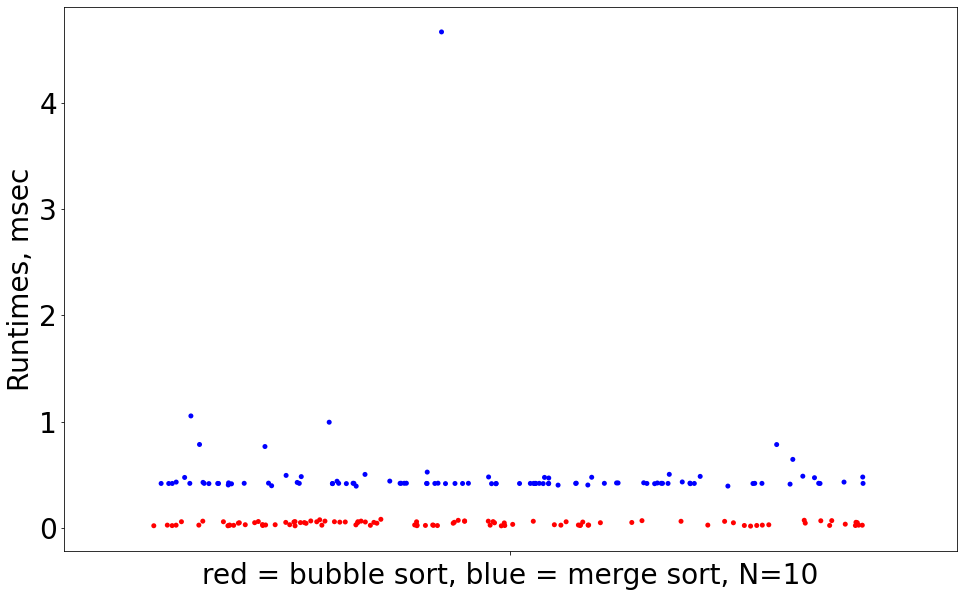

In [30]:
plt.figure(figsize = (16,10)); _ = make_runtimes_plot()

So, *bubble sort is faster*. Right? Or do you see any problems with this approach?

### Problem 1: scaling
First, let us consider what happens as we change the length of the input. It is what usually matters -- how does our algorithm *scale* (no one is really interested in sorting arrays with `N=5`...)

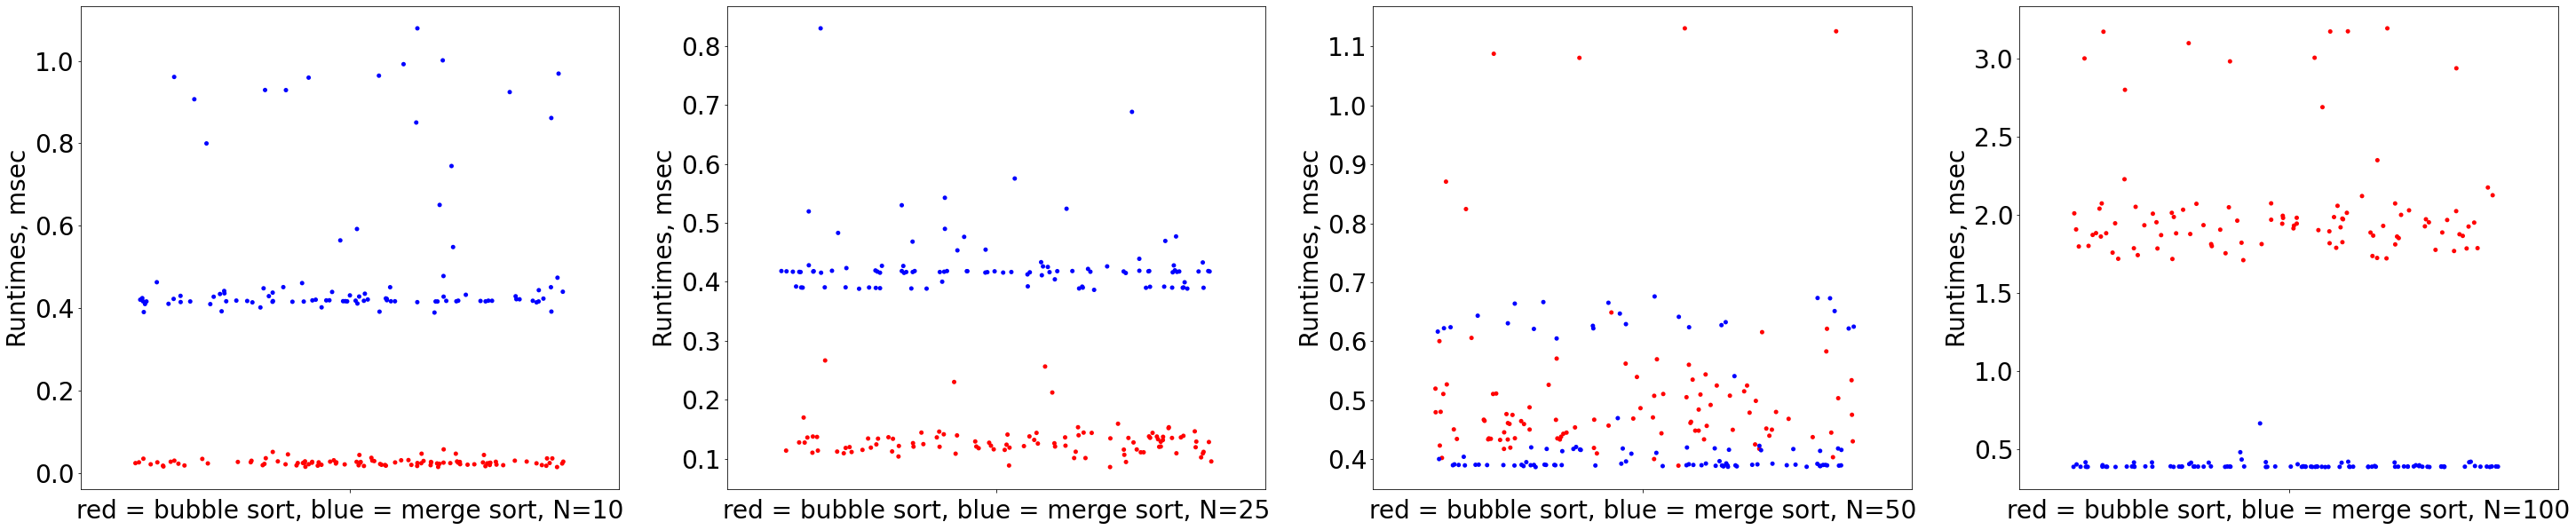

In [31]:
plt.figure(figsize = (50,10))
plt.subplot(1,4,1); make_runtimes_plot(N=10)
plt.subplot(1,4,2); make_runtimes_plot(N=25)
plt.subplot(1,4,3); make_runtimes_plot(N=50)
plt.subplot(1,4,4); _ = make_runtimes_plot(N=100)

So okay, to understand what's going on here, we'd need to run the experiment for several different `N`-s. Say, let us plot mean runtimes instead...

In [32]:
def make_mean_runtimes(sort_function, gen_function = get_rnd_instance, N1 = 10, N2 = 100, no_inst=50):
    """Creates a list of **mean** runtimes for different values of N."""
    runtimes = []
    for i in range(N2-N1):
        runtimes.append(np.mean(
            get_runtimes(sort_function, gen_function, 
                         N = N1 + i, no_inst = no_inst))*1000)
    
    return runtimes

N1 = 5; N2 = 100

rt_bsort = make_mean_runtimes(bubble_sort, N1=N1, N2 = N2)
rt_msort = make_mean_runtimes(merge_sort, N1=N1, N2 = N2)

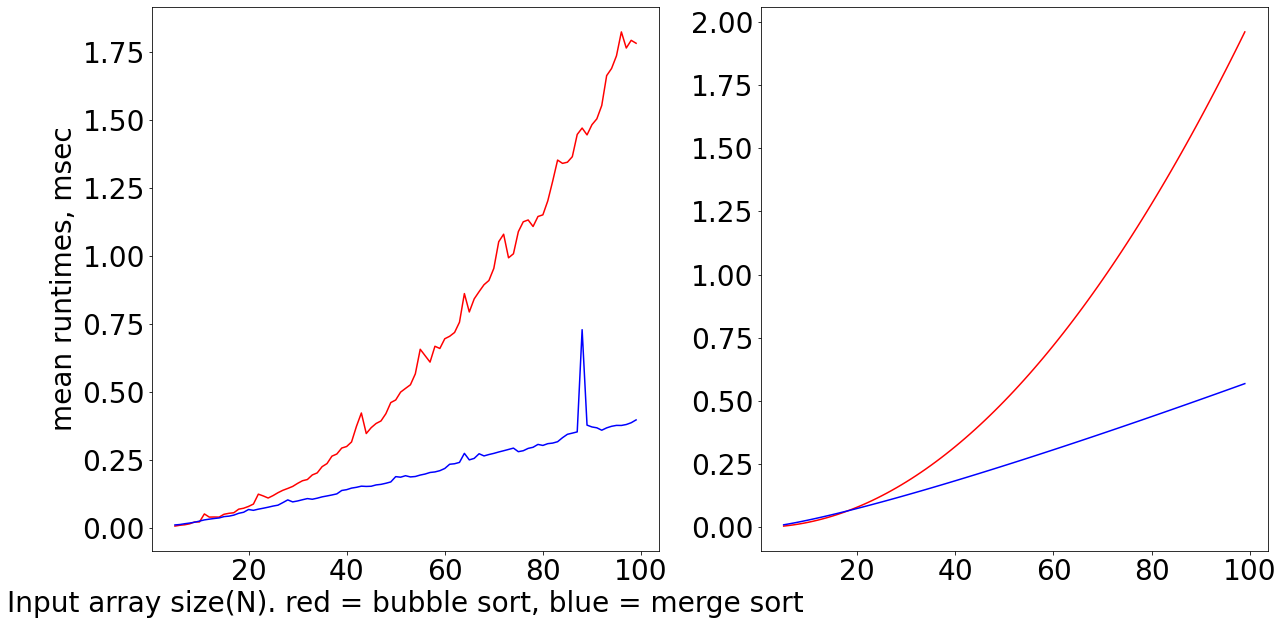

In [33]:
plt.rcParams.update({'font.size': 28})
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot([N1 + i for i in range(N2-N1)], rt_bsort, 'r-')
plt.plot([N1 + i for i in range(N2-N1)], rt_msort, 'b-')
plt.gca().set(xlabel='Input array size(N). red = bubble sort, blue = merge sort', ylabel='mean runtimes, msec')
plt.subplot(1,2,2)
plt.plot([N1 + i for i in range(N2-N1)], [x*x/5000 for x in range(N1, N2)], 'r-')
plt.plot([N1 + i for i in range(N2-N1)], [x*log(x)/800 for x in range(N1,N2)], 'b-')

### So, what to do?
Quite often you can see this $O(\cdot)$ notation. This is an *upper bound* on the respective runtime. What is meant, usually, is this is how the runtime behaves as the *size* of the problem increases infinitely. For our case, the problem size is, naturally, $N$ -- how many numbers are there in the array.

People usually do not care about multiplicative constants (since $Ax^3$ will grow more than $Bx^2$, eventually, for any $A,B>0$ and $x>0$).

Hey, asymptotics is a big deal, actually:

In [ ]:

ns = [n for n in range(1,21)]

plt.figure(figsize = (16,10))
plt.plot(ns, label="linear")
plt.plot([n * log(n) for n in ns], label="N log N")
plt.plot([n**2 for n in ns], label="$N^2$")
plt.plot([n**3 for n in ns], label="$N^3$")
plt.plot([2**n for n in ns], label="$2^N$")
plt.legend()

More **formally**: runtime $T(n) \in O(g(n))$ if and only if there exists some $n_0 > 0$ and $C > 0$ such that for all $n>n_0:~T(n)\leq Cg(n)$.

This allows to disregard details and just count operations that do not depend on the input size.

For example, take **bubble sort**:

- In the worst case, we will have to flip every one of the $N$ numbers with every other (if the input array is sorted, but in the wrong way -- e.g., in descending instead of ascending order). 
- Then, we will have to perform $N(N-1)$ `swap` operations -- at most, regardless of anything. 
- This is $N^2-N$, which still grows as fast as $N^2$, if $N$ increases infinitely. 
    
So, we'd write it as 
> bubble sort worst-case runtime is in $O(N^2)$. 

(There is no way it could run slower, right?)

**Now, for the merge sort**:

- Every `merge` operation takes $O(N)$ time, since it performs at most $N$ "ticks" while merging. We'd just need to count how many times this function could be invoked. 
- Well, this is easy: this is the number of times we can divide $N$ into two, since each time we split it in two halves. 
- If you think about it, this is the largest number $k$ such that $2^k \leq N$. We can use a slight overestimate, a number $k$ such that $2^k=N$, which mathematicians call $\log_2 N$. 
- Therefore, we can say that we invoke the `merge` function (which takes $O(N)$ time), $\log_2 N$ times.
    
So, the asymptotic worst-case runtime of the merge sort is $O(N \log N)$ (computer science people sometimes omit this subscript of $2$, if most of the logarithms are base-two. And also it doesn't matter in $O(\cdot)$ notation if you recall properties of the logarithm...).

**So:**
- $O(\cdot)$ is asymptotic runtime, when the problem size skyrockets. Up to a (multiplicative) const.
- bubble sort "runs is" $O(N^2)$, merge sort --- in $O(N\textrm{log}N)$.
- we have calculated this by counting operations that do not depend on the problem size.

**Any questions so far?**

### Problem 2: special inputs
Then, let us feed in some pretty special inputs:

In [ ]:
def gen_magic_sequence(N):
    """Generates a "special" input sequence (with only two elements swapped)"""
    
    input_sorted = [i+1 for i in range(N)] # generate a sequence of numbers
    input_unsorted = [i+1 for i in range(N)]
    a = input_unsorted[N // 2]
    b = input_unsorted[N // 2 + 1]
    input_unsorted[N // 2] = b; input_unsorted[N // 2 + 1] = a # how 'bout this?!
    
    return input_sorted, input_unsorted

In [ ]:
plt.figure(figsize = (30,10))
plt.subplot(1,2,1); make_runtimes_plot(N=50)
plt.subplot(1,2,2); _ = make_runtimes_plot(gen_magic_sequence, N=50)

Huh?.. 😕

Ah, okay, maybe this is scaling again?

In [ ]:
rt_bsort_m = make_mean_runtimes(bubble_sort, gen_function=gen_magic_sequence, N1=N1, N2 = N2)
rt_msort_m = make_mean_runtimes(merge_sort,  gen_function=gen_magic_sequence, N1=N1, N2 = N2)

In [ ]:
plt.figure(figsize = (20,10)); plt.subplot(1,2,1)
plt.plot([N1 + i for i in range(N2-N1)], rt_bsort_m, 'r-')
plt.plot([N1 + i for i in range(N2-N1)], rt_msort_m, 'b-')
plt.gca().set(xlabel='Input array size(N). red = bubble sort, blue = merge sort', ylabel='mean runtimes, msec')
plt.subplot(1,2,2); plt.plot([N1 + i for i in range(N2-N1)], [x*x/5000 for x in range(N1, N2)], 'r-')
plt.plot([N1 + i for i in range(N2-N1)], [x*log(x)/800 for x in range(N1,N2)], 'b-')

What happened?! 🤯🤯🤯 Why is this so?..

**And the answer is:** well, it depends on input! (surprise!). So, intuitively, we'd want to differentiate between the *worst-case*, *best-case*, and *average* performance (whatever it all would mean, precisely).

Actually, what we see, say, on Wiki [page](https://en.wikipedia.org/wiki/Merge_sort) describing an alorithm, is exactly this.

Therefore, people quite often talk about the *asymptotic worst-case runtime*. Now you have seen what (almost) each word means :)


## A word on other properties
### Space requirements
You can use this $O(\cdot)$ notation to analyze other requirements as well: for example, how much space does your (or someone else's) algorithm requires.

For example, note that bubble sort does not require additional space (it can run over the same input array, *in-place*), while our implementation of merge sort required $O(N)$ units of additional memory.

### Can we run it in parallel?
Also, it might be interesting how difficult it is to build a *parallel* version of an algorithm? E.g., compare selection sort and merge sort.

### A final remark on this
In practice, please do sorting like this, unless there are good reasons to do otherwise:

In [ ]:
np.sort([1,5,2,7,3,4,1])

In [ ]:
# or, if you want to look fancy:
np.sort([1,5,2,7,3,4,1], kind='mergesort')

No need to reinvent the bicycle. There are many algorithms already implemented for you in several great libraries. For example, lots of useful things are in [scikit-learn](https://scikit-learn.org/stable/) and (as you can tell even from this notebook) [numpy](https://numpy.org/), and so on. So if you are thinking to implement something -- a good first step is

**❗❗ to look around, maybe something is already implemented ❗❗**

(and chances are, with high-quality code, with support for special hardware, if needed, etc.).

# Finally: NP-hard problems

It seems that not all problems are solvable in polynomial time (in general case). There is a class of problems such that:
- a (given) solution can be *verified* in polynomial time,
- but no known algorithm exists to solve it (i.e., find a solution in first place) in polynomial time. (actually, *solving it in polynomial time would allow to solve some more really hard problems in polynomial time*)

Is is a little more complicated than that, actually -- you can check out the concepts of [NP-hardness](https://en.wikipedia.org/wiki/NP-hardness), and [P vs NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) problem, if you are interested. But if so, picking up a Computer Science textbook (or a course) might be a good idea.

In practice, it means that there is a big class of (relevant) problems, that do not allow for efficient exact solution. In this case people sometimes try to devise *approximate* algorithms (and sometimes, pretty successfully). OR even heuristics (that just gives "kinda okay" solutions, without any guarantees... pretty good in practice sometimes, though).

Selecting optimal phylogenetic trees / multiple sequence alignment (see, e.g., [wiki](https://en.wikipedia.org/wiki/Sequence_alignment)), [k-means](https://en.wikipedia.org/wiki/K-means_clustering) clustering, and many others are "computationally difficult". Also, see the [List](https://en.wikipedia.org/wiki/List_of_NP-complete_problems) of NP-complete problems for some more examples.

# Take-aways from Topics 1 and 2
- (Some) algorithms are cool
- They can (and should) be analyzed in a systematic, scientific way,
- ...and are characterized by runtime, space requirements, and correctness, among other things.
- Asymptotic runtime: $O(\cdot)$ (and Co.) notations describe how does the runtime grow with the problem size. 
- Yes, usually that's a big deal.
- Sometimes we discuss best-case, worst-case, and average performance.
- Cool algorithms are numerous; existing libraries are your friends (`numpy`, `sklearn`, etc. -- if we talk Python)
- There are theoretical limits, though. We cannot do sorting (unless you know something about the array) in less than $O(N\log N)$ worst-case. It *seems* we cannot really solve many problems in polynomial time (and this is actually a serios research direction).

**Any questions?**